In [13]:
import sys
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import squarify

In [4]:
expenditures = pd.read_csv('expenditures.txt', sep='\t')

In [38]:
expenditures.drop('sex',axis=1,inplace=True)

In [39]:
norm = matplotlib.colors.Normalize(vmin=min(expenditures[expenditures['year']==2008]['expenditure']), 
                                   vmax=max(expenditures[expenditures['year']==2008]['expenditure']))
colors = [matplotlib.cm.Blues(norm(value)) for value in expenditures[expenditures['year']==2008]['expenditure']]


(0.0, 100.0, 0.0, 100.0)

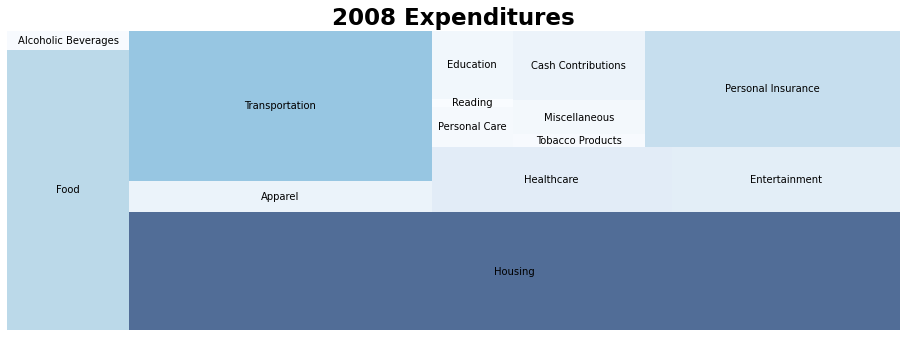

In [40]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 5.5)

squarify.plot(label=expenditures[expenditures['year']==2008]['category'], 
              sizes=expenditures[expenditures['year']==2008]['expenditure'],
              color = colors,
              alpha=.7 )

plt.title("2008 Expenditures",fontsize=23,fontweight="bold")

plt.axis('off')

In [41]:
expenditures.groupby(['category','year']).sum()['expenditure']

category             year
Alcoholic Beverages  1984     275
                     1985     306
                     1986     271
                     1987     289
                     1988     269
                             ... 
Transportation       2004    7801
                     2005    8344
                     2006    8508
                     2007    8758
                     2008    8604
Name: expenditure, Length: 350, dtype: int64

In [44]:
ep = expenditures.pivot(index="year", columns="category", values="expenditure")

In [50]:
ep.sum()

category
Alcoholic Beverages      8424
Apparel                 41833
Cash Contributions      27987
Education               14498
Entertainment           44273
Food                   119297
Healthcare              47383
Housing                280256
Miscellaneous           18327
Personal Care           11123
Personal Insurance      84269
Reading                  3636
Tobacco Products         6936
Transportation         160694
dtype: int64

In [51]:
ept5 = ep[['Transportation','Housing','Food','Personal Insurance','Healthcare']]

In [52]:
ept5

category,Transportation,Housing,Food,Personal Insurance,Healthcare
year,,,,,
1984,4304,6674,3290,1897,1049
1985,4587,7087,3477,2016,1108
1986,4842,7292,3448,2127,1135
1987,4600,7569,3664,2175,1135
1988,5093,8079,3748,2249,1298
1989,5187,8609,4152,2472,1407
1990,5120,8703,4296,2592,1480
1991,5151,9252,4271,2787,1554
1992,5228,9477,4723,2750,1634


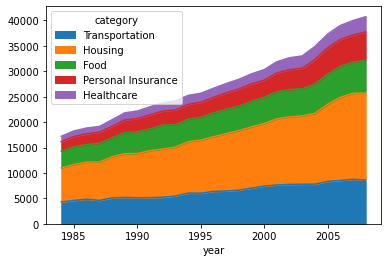

In [53]:
ept5.plot.area()

In [54]:
ept5_perc = ept5.divide(ept5.sum(axis=1), axis=0)

In [83]:
ept5_perc.reset_index(inplace=True)

In [89]:
#ept5_perc.drop('category',axis=1,inplace=True)
ept5_perc

category,year,Transportation,Housing,Food,Personal Insurance,Healthcare
0,1984,0.250029,0.387708,0.191124,0.110201,0.060939
1,1985,0.250999,0.387798,0.190260,0.110315,0.060629
2,1986,0.256952,0.386967,0.182976,0.112874,0.060231
3,1987,0.240297,0.395393,0.191402,0.113619,0.059291
4,1988,0.248840,0.394733,0.183124,0.109884,0.063419
5,1989,0.237641,0.394420,0.190223,0.113254,0.064461
6,1990,0.230724,0.392186,0.193592,0.116804,0.066694
7,1991,0.223811,0.401999,0.185575,0.121095,0.067521
8,1992,0.219553,0.397993,0.198345,0.115488,0.068621
9,1993,0.225592,0.398643,0.181987,0.120304,0.073473


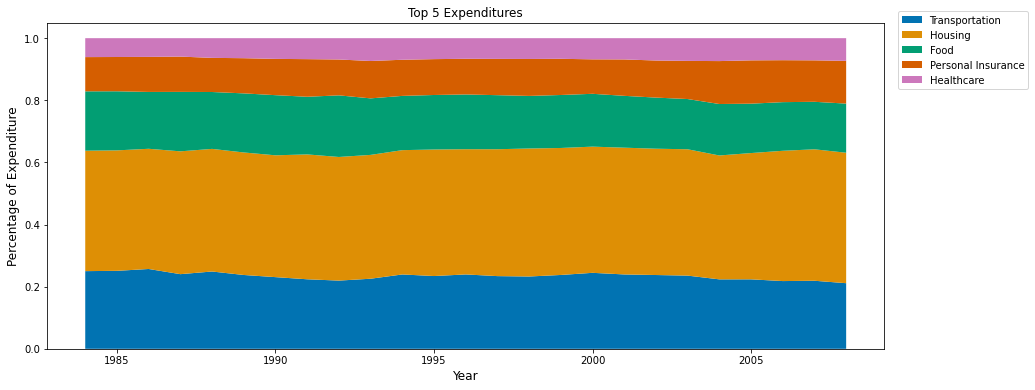

In [121]:
#ept5_perc.plot.area()
import seaborn as sns
sns.set_palette("colorblind")

f, ax = plt.subplots(figsize=(15, 6))

stack = plt.stackplot(ept5_perc['year'], 
              [ept5_perc['Transportation'],
                 ept5_perc['Housing'],
                 ept5_perc['Food'],
                 ept5_perc['Personal Insurance'],
                 ept5_perc['Healthcare']],
                labels=['Transportation','Housing','Food','Personal Insurance','Healthcare'])
ax.set_xlabel('Year', size=12)
ax.set_ylabel('Percentage of Expenditure', size=12)
ax.set_title('Top 5 Expenditures')
ax.set_ylim(bottom=0)
ax.legend(bbox_to_anchor=(1.01, 1.05), loc='upper left')

In [57]:
unemploy = pd.read_csv('unemployement-rate-1948-2010.csv')

In [59]:
unemploy.drop('Series id',axis=1,inplace=True)

In [66]:
avg_unemploy = unemploy.groupby(['Year']).mean()['Value']

In [73]:
avg_unemploy = avg_unemploy.to_frame().reset_index()

In [74]:
avg_unemploy

,Year,Value
0,1948,3.750000
1,1949,6.050000
2,1950,5.208333
3,1951,3.283333
4,1952,3.025000
...,...,...
58,2006,4.608333
59,2007,4.608333
60,2008,5.816667
61,2009,9.275000


(0.0, 10.193749999999998)

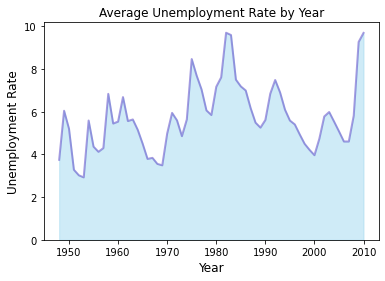

In [77]:
plt.fill_between(avg_unemploy['Year'], avg_unemploy['Value'],
                 color="skyblue", alpha=0.4)
plt.plot(avg_unemploy['Year'], avg_unemploy['Value'], 
         color="Slateblue",
         alpha=0.6, linewidth=2)

#plt.tick_params(labelsize=12)
#plt.xticks(np.arange(12), np.arange(1,13))
plt.xlabel('Year', size=12)
plt.ylabel('Unemployment Rate', size=12)
plt.title('Average Unemployment Rate by Year')
plt.ylim(bottom=0)